In [22]:
# Basic building-block packages
import numpy as np

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Fancy-smansy maths
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm

## Solve Lorenz System

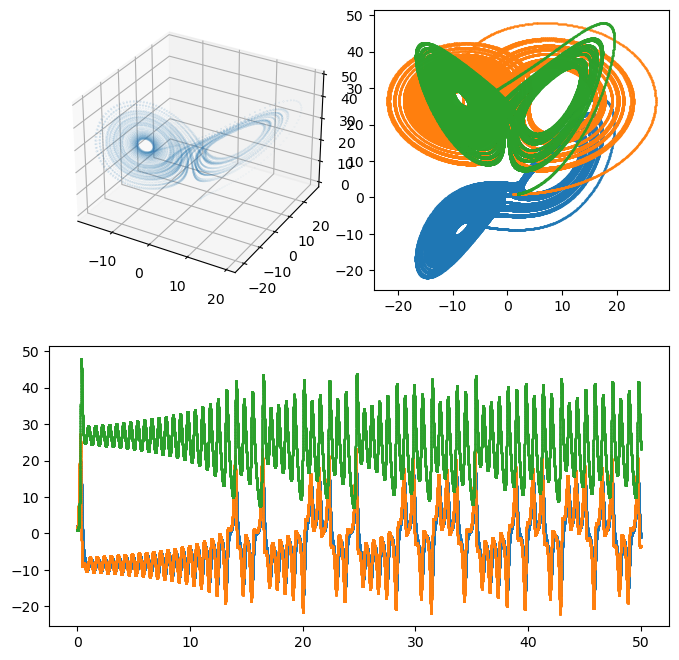

In [9]:
def sys_DE(t,w,sigma,rho,beta):
    """
    Defines Chua's equations

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z]
        t :  time
    """
    x,y,z = w
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    return dx,dy,dz

t_span = (0,50)
t_eval = np.linspace(*t_span,int(1e5)) # No need to be so fine like here. 
xyz0 = [2,1,1] # Recall that z is in Amperes (a large unit).
solution = solve_ivp(sys_DE,t_span,xyz0,t_eval=t_eval,first_step=1e-7,
                     args=[10,28,8/3])

x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]
time = solution.t

# Plot the solutions

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = fig.add_subplot(grid[0,0], projection='3d')
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

axs1.scatter(x_sol[::10],y_sol[::10],z_sol[::10]
               ,s=0.003
               )

axs2.scatter(x_sol,y_sol,s=0.3)
axs2.scatter(y_sol,z_sol,s=0.3)
axs2.scatter(x_sol,z_sol,s=0.3)

for var in [x_sol,y_sol,z_sol]:
    axs3.scatter(time, var,s=0.3)

In [52]:

########## End of function defining ##########

X1_0 = np.array([2.0,1.00,1]) 
X2_0 = np.array([2.1,1.01,1])

t_eval = np.linspace(*t_span,int(1e7)) # No need to be so fine like here. 

lyau = []
for rho in tqdm(np.linspace(20,30,10),leave=False):
    
    data = []
    for X_0 in [X1_0,X2_0]:
        solution = solve_ivp(sys_DE,t_span,X_0
                            # ,first_step=1e-7
                            ,args=[10,rho,8/3]
                            ,t_eval=t_eval
                            )

        x1 = solution.y[0]
        y1 = solution.y[1]
        z1 = solution.y[2]
        t1 = solution.t

        data.append(np.array([x1,y1,z1,t1]))
    dX0 = norm(X1_0-X2_0)
    
    X1 = data[0][:3]
    X2 = data[1][:3]
    t = data[0][3]

    dX = norm(X1-X2,axis=0)
    y = np.log(dX/dX0)[:]

    frc = int(len(y)/4)
    t = t[:frc] ; y = y[:frc]

    fit = linregress(t,y)
    m = fit.slope
    b = fit.intercept
    corr = fit.rvalue**2
    
    lyau.append(y)

    plt.scatter(t,y,s=0.1,alpha=0.03)
    X = np.array([0,max(t)])
    plt.plot(X,m*X+b,label=f"{round(rho,ndigits=1)}")

plt.legend(loc="upper right")


  0%|          | 0/10 [00:00<?, ?it/s]

[0.10049876 0.10049522 0.10049168 ... 0.06587097 0.06587023 0.06586948]


 10%|█         | 1/10 [00:02<00:20,  2.28s/it]

[0.10049876 0.10049528 0.1004918  ... 0.00930561 0.00930568 0.00930575]


 20%|██        | 2/10 [00:04<00:17,  2.23s/it]

[0.10049876 0.10049533 0.10049191 ... 0.02352254 0.0235227  0.02352286]


 30%|███       | 3/10 [00:06<00:14,  2.13s/it]

[0.10049876 0.10049539 0.10049202 ... 0.07876671 0.07876629 0.07876587]


 40%|████      | 4/10 [00:08<00:12,  2.13s/it]

[ 0.10049876  0.10049544  0.10049213 ... 15.56795111 15.56830659
 15.56866207]


 50%|█████     | 5/10 [00:10<00:10,  2.13s/it]

[ 0.10049876  0.1004955   0.10049224 ... 10.71912803 10.71926529
 10.71940256]


 60%|██████    | 6/10 [00:12<00:08,  2.12s/it]

[ 0.10049876  0.10049555  0.10049235 ... 40.05489562 40.05448389
 40.05407207]


 70%|███████   | 7/10 [00:14<00:06,  2.05s/it]

[ 0.10049876  0.10049561  0.10049246 ... 14.73172877 14.73135398
 14.73097921]


 80%|████████  | 8/10 [00:16<00:04,  2.06s/it]

[ 0.10049876  0.10049566  0.10049257 ... 18.38654926 18.38721042
 18.3878716 ]


 90%|█████████ | 9/10 [00:18<00:01,  1.98s/it]

[ 0.10049876  0.10049572  0.10049268 ... 31.24144078 31.24147303
 31.24150525]
